In [4]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import *
from sklearn.linear_model import *
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import *
from sklearn.ensemble import *
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.svm import *
from sklearn.neighbors import *
from sklearn.neural_network import *
from sklearn.metrics import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns

sns.set(font="simhei", style="white", font_scale=1.6)
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False  # 解决坐标轴的负号显示问题


def chinese2english(df):
    columnsDict = {
        'Length': '长度',
        'Geographic Region': '地理区域',
        'Country': '国家',
        'Listing Price': '售价',
        'Year': '年份',
        'Make Variant': '名称',
        'LWL': '水线长度',
        'Beam': '宽度',
        'Draft': '吃水',
        'Displacement': '排水',
        'Sail Area': '帆面积',
        'AVG Cargo Thro.': '平均货物吞吐量',
        'GDP': 'GDP',
        'GDP per capita': '人均GDP',
        'Average proportion of total logistics cost to GDP': '物流总成本占GDP的平均比例',
        'Hull Type': '类型',
    }
    print({v: k for k, v in columnsDict.items()})
    return df.rename(columns={v: k for k, v in columnsDict.items()})

def getxy():
    exceptCol = [
        '地理区域',
        '平均货物吞吐量',
        '人均GDP',
        '物流总成本占GDP的平均比例',
    ]

    df = pd.read_excel(r'../数据预处理/xlsx/合并修正缩放后总数据.xlsx', sheet_name='未编码汇总')
    df.drop(columns=exceptCol, inplace=True, axis=1)
    X = df
    y = df.pop('售价')
    return X, y, df

{'长度': 'Length', '地理区域': 'Geographic Region', '国家': 'Country', '售价': 'Listing Price', '年份': 'Year', '名称': 'Make Variant', '水线长度': 'LWL', '宽度': 'Beam', '吃水': 'Draft', '排水': 'Displacement', '帆面积': 'Sail Area', '平均货物吞吐量': 'AVG Cargo Thro.', 'GDP': 'GDP', '人均GDP': 'GDP per capita', '物流总成本占GDP的平均比例': 'Average proportion of total logistics cost to GDP', '类型': 'Hull Type'}


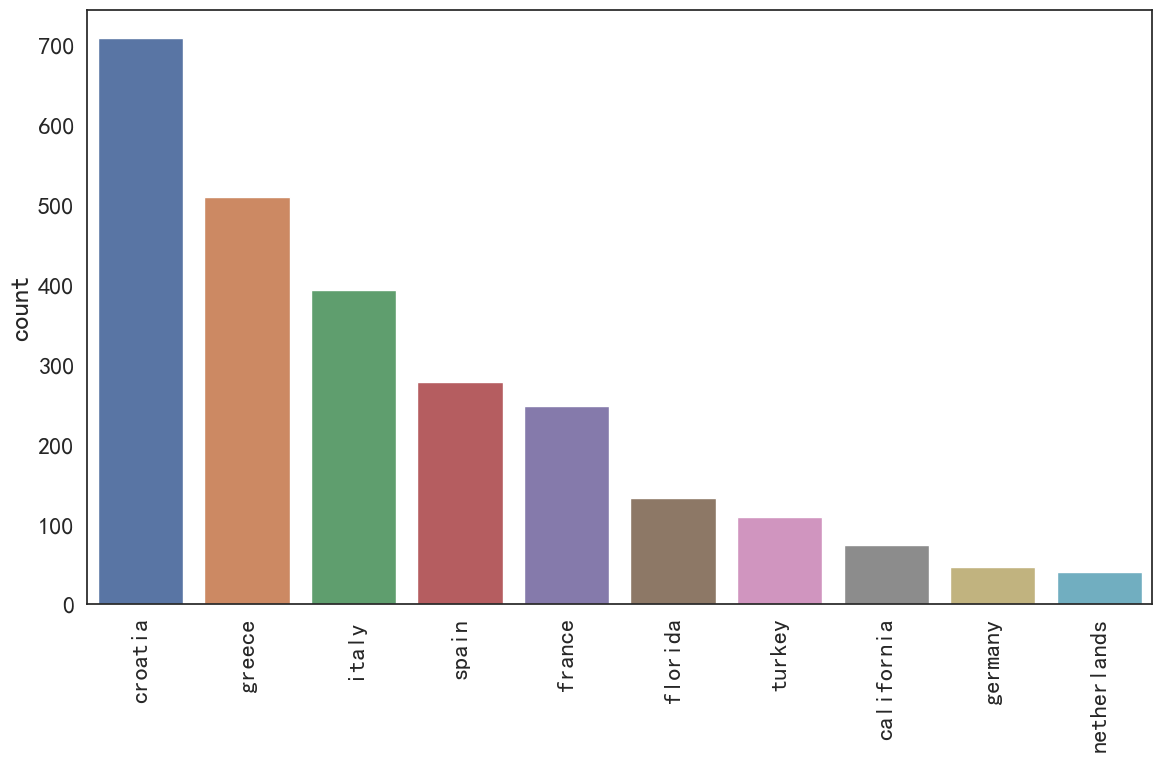

In [16]:
X, y, df = getxy()

df = chinese2english(df)

# 选出列中前两名出现的数据
top_n = 10
counts = df['Country'].value_counts().nlargest(top_n).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.countplot(x='Country', data=df[df['Country'].isin(counts.index)], order=counts.index)
plt.xlabel('')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('两种帆船数据合并后，按国家排名前十的.svg')
plt.show()
